# Build a supervised model on California Housing Data Set
Predict the House Value. Use Median House Value as your dependent variable. 

# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import mglearn as mglearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy as sp
from scipy import stats
import sklearn as sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from IPython.display import display

In [2]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Load the data

In [3]:
# Fetch California Housing dataset
from sklearn.datasets import fetch_california_housing
ca_housing = fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)

# Create Pandas DataFrame
cal_housing_price = pd.DataFrame(ca_housing.target, columns=['MedValue'])
cal_housing_variables_pd = pd.DataFrame(ca_housing.data, columns=ca_housing.feature_names)
cal_housing_pd = pd.concat([cal_housing_price, cal_housing_variables_pd], axis=1)
cal_housing_pd.head()

,MedValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Explore the data

In [4]:
# Metadata Descriptive
print("Keys of ca_housing:\n", ca_housing.keys())
print("Feature names:\ n", ca_housing['feature_names'])
print("Shape of data:", ca_housing['data'].shape)
print("Type of target:", type(ca_housing['target']))
print("Target:\ n", ca_housing['target'])
print("Shape of target:", ca_housing['target'].shape)

Keys of ca_housing:
 dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Feature names:\ n ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of data: (20640, 8)
Type of target: <class 'numpy.ndarray'>
Target:\ n [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Shape of target: (20640,)


In [5]:
# Summary statistics
cal_housing_pd.describe()

,MedValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


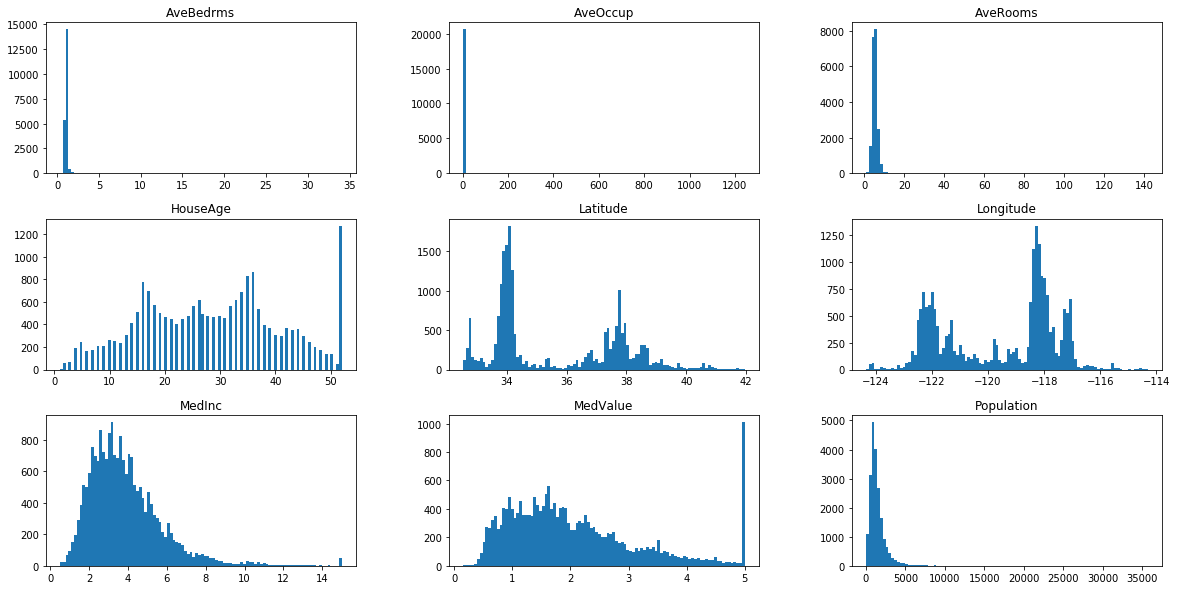

In [6]:
# create histograms
plt.figure(figsize=(20,10))
cal_housing_pd.hist(figsize=(20,10), bins=100, grid=False)
plt.show()

[]

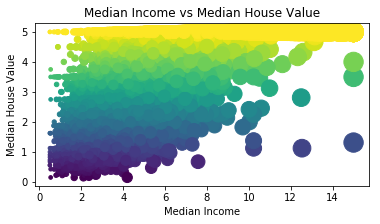

In [7]:
plt.figure(figsize=(6,3))

plt.scatter(cal_housing_pd['MedInc'],cal_housing_pd['MedValue'],c=cal_housing_pd['MedValue'],s=cal_housing_pd['MedInc']*25)
plt.colorbar
plt.title('Median Income vs Median House Value' )
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.plot()

# Data preparation - Issues resolution

In [8]:
# Look for nulls
cal_housing_pd.isna().sum()

MedValue      0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

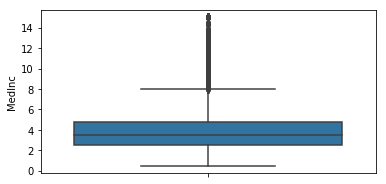

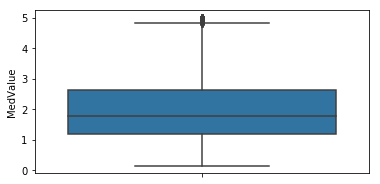

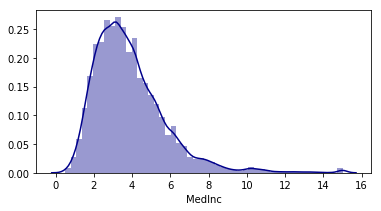

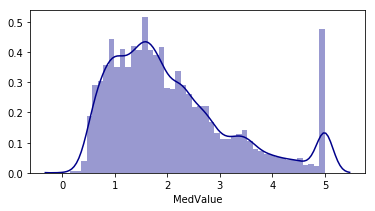

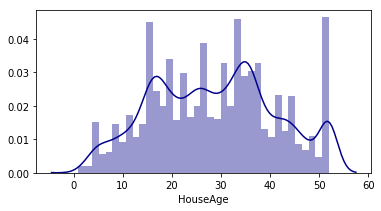

In [9]:
# boxplot on Median Income, Median Value, House Age review outliers from exploration histograms
plt.figure(figsize=(6,3))
sns.boxplot(y='MedInc',data=cal_housing_pd)
plt.plot

plt.figure(figsize=(6,3))
sns.boxplot(y='MedValue',data=cal_housing_pd)
plt.plot

plt.figure(figsize=(6,3))
sns.distplot(cal_housing_pd['MedInc'],color='darkblue')
plt.show()

plt.figure(figsize=(6,3))
sns.distplot(cal_housing_pd['MedValue'],color='darkblue')
plt.show()

plt.figure(figsize=(6,3))
sns.distplot(cal_housing_pd['HouseAge'],color='darkblue')
plt.show()

# Feature Engineering 

In [10]:
# Identify Outliers in MedValue
cal_housing_pd[cal_housing_pd['MedValue']>4.5]['MedValue'].value_counts().head()

5.00001    965
5.00000     27
4.75000      8
4.83300      6
4.66700      4
Name: MedValue, dtype: int64

In [11]:
# Locate MedValue greater than 500K
cal_housing_pd=cal_housing_pd.loc[cal_housing_pd['MedValue']<5,:]

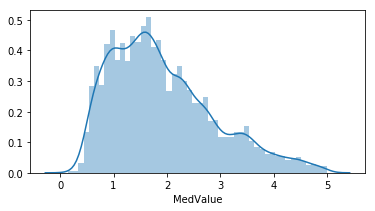

In [12]:
# Plot showing removal of MedValue Outlier
plt.figure(figsize=(6,3))
sns.distplot(cal_housing_pd['MedValue'])
plt.show()

In [13]:
# Identify Outliers in MedInc
cal_housing_pd[cal_housing_pd['MedInc']>13]['MedInc'].value_counts().head()

15.0001    3
13.1477    1
13.1107    1
Name: MedInc, dtype: int64

In [14]:
# Locate MedInc less than 15
cal_housing_pd=cal_housing_pd[cal_housing_pd['MedInc']<15]

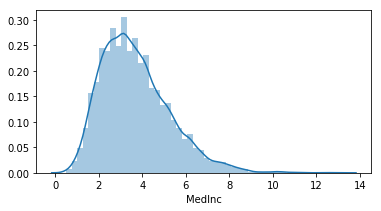

In [15]:
# Plot showing removal of MedInc Outlier (see boxplot under data prep for comparison)
plt.figure(figsize=(6,3))
sns.distplot(cal_housing_pd['MedInc'])
plt.show()

In [16]:
# Identify Outliers in HouseAge (see boxplot under data prep for comparison)
cal_housing_pd[cal_housing_pd['HouseAge']>48]['HouseAge'].value_counts().head()

52.0    1092
49.0     125
50.0     123
51.0      44
Name: HouseAge, dtype: int64

In [17]:
# Locate House Age less than 52
cal_housing_pd=cal_housing_pd[cal_housing_pd['HouseAge']<52]

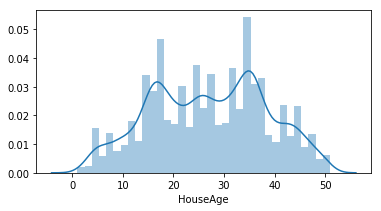

In [18]:
# Plot showing removal of HouseAge Outlier (see boxplot under data prep for comparison)
plt.figure(figsize=(6,3))
sns.distplot(cal_housing_pd['HouseAge'])
plt.show()

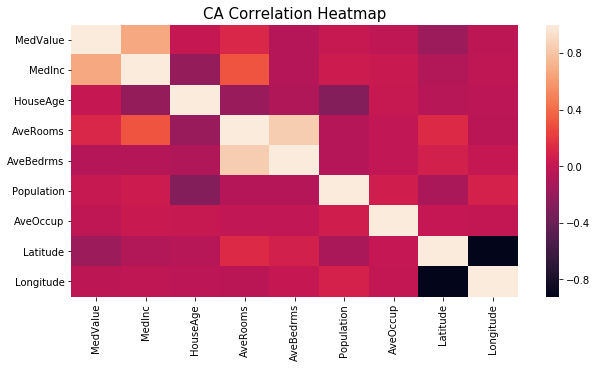

In [19]:
# Plot Correlation Heatmap
plt.figure(figsize=(10,5))
ax = plt.axes()
corr = cal_housing_pd.corr()
sns.heatmap(corr, ax=ax, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
ax.set_title('CA Correlation Heatmap', fontsize=15)
plt.show()

In [20]:
# Dropping highly correlated AveBedrms (vs. AveRooms) for optimized Regression analysis
cal_housing_pd.drop(['AveBedrms'], axis=1, inplace=True)
cal_housing_pd.head()

,MedValue,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
8,2.267,2.0804,42.0,4.294118,1206.0,2.026891,37.84,-122.26
15,1.400,2.1250,50.0,4.242424,697.0,2.640152,37.85,-122.26
18,1.587,1.9911,50.0,5.343675,990.0,2.362768,37.84,-122.26


# Build Supervised Model 1: K-Nearest Neighbors Regressor

In [21]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics importe mean_squared_error, r2_score

# X = Remove y from cal_housing_pd (so we can use 'engineered' dataframe)
cal_housing_pd_data = cal_housing_pd.drop(['MedValue'], axis=1)

# y = Remove X from cal_housing_pd by selecting the MedValue column
cal_housing_pd_target = cal_housing_pd['MedValue']

# Train Test Split with a DataFrame (using 'engineered' dataframe)
Xcal_train, Xcal_test, ycal_train, ycal_test = train_test_split(cal_housing_pd_data, cal_housing_pd_target, shuffle=True, test_size=0.20, random_state=321)


# Transform pd dataframe into array (.values)
X_train = Xcal_train.values
X_test = Xcal_test.values

y_train = ycal_train.values
y_test = ycal_test.values

In [22]:
# loop through
knn_results = []
for i in range(1,20):
    # make predictions using looped neighbors
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train, y_train)
    knn_results.append((i, reg.score(X_train, y_train), reg.score(X_test, y_test))) #saves value of n used as a tuple with R2
print("Train set predictions:\n", reg.predict(X_train))

Train set predictions:
 [1.58036842 1.81121053 1.76626316 ... 1.63615789 1.99505263 1.97484211]


In [23]:
knn_results_df = pd.DataFrame(knn_results, columns=['n','RsqTrain', 'RsqTest'])
knn_results_df

,n,RsqTrain,RsqTest
0,1,1.000000,-0.290470
1,2,0.659042,-0.023434
2,3,0.521531,0.058709
3,4,0.441787,0.097927
4,5,0.386426,0.107793
5,6,0.347954,0.117382
6,7,0.316220,0.117096
7,8,0.289705,0.115941
8,9,0.270895,0.116154
9,10,0.255382,0.112144


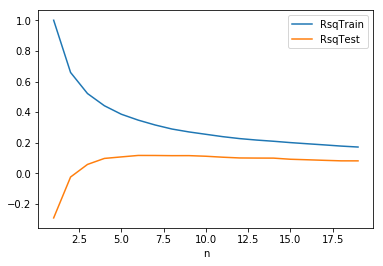

In [24]:
# display inflection point of the model where 6 appears to be the best fit on training set
# training set n decreases as number of neighbors increases, test set gets more stable at about 6
knn_results_df.plot(x='n', y=['RsqTrain', 'RsqTest'])

In [25]:
reg_bestfit = KNeighborsRegressor(n_neighbors=6)
reg_bestfit.fit(X_train, y_train)
print("Training set R^2 score: {:.2f}".format(reg_bestfit.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(reg_bestfit.score(X_test, y_test)))

Training set R^2 score: 0.35
Test set R^2 score: 0.12


# Build Supervised Model 2: Ridge Regression

In [26]:
from sklearn.linear_model import Ridge #uses regularization on the inputs, calculating the L2 norms (square of the difference)
ridge = Ridge().fit(X_train, y_train) #uses alpha as parameter in the fit
print("Training set R^2 score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set R^2 score: 0.57
Test set R^2 score: 0.57


In [27]:
# make predictions using looped alpha
ridge_results = []

for alpha_val in np.linspace(0.0, 1, num=10): #linspace is number of samples between start and end for alpha between 0 and 1
    ridge_regressor = Ridge(alpha=alpha_val)
    ridge_regressor.fit(X_train, y_train)
    ridge_results.append((alpha_val, ridge_regressor.score(X_train, y_train),ridge_regressor.score(X_test, y_test)))
print("Train set predictions:\n", ridge_results)

Train set predictions:
 [(0.0, 0.5736386075353366, 0.5674645197404644), (0.1111111111111111, 0.5736386074611091, 0.5674647117971121), (0.2222222222222222, 0.5736386072384432, 0.5674649036865865), (0.3333333333333333, 0.5736386068673647, 0.5674650954089169), (0.4444444444444444, 0.5736386063478986, 0.5674652869641318), (0.5555555555555556, 0.5736386056800706, 0.5674654783522608), (0.6666666666666666, 0.5736386048639063, 0.5674656695733323), (0.7777777777777777, 0.5736386038994309, 0.5674658606273757), (0.8888888888888888, 0.5736386027866698, 0.5674660515144198), (1.0, 0.5736386015256483, 0.5674662422344934)]


In [28]:
ridge_results_df = pd.DataFrame(ridge_results, columns=['alpha_val','RsqTrain', 'RsqTest'])
ridge_results_df

,alpha_val,RsqTrain,RsqTest
0,0.000000,0.573639,0.567465
1,0.111111,0.573639,0.567465
2,0.222222,0.573639,0.567465
3,0.333333,0.573639,0.567465
4,0.444444,0.573639,0.567465
5,0.555556,0.573639,0.567465
6,0.666667,0.573639,0.567466
7,0.777778,0.573639,0.567466
8,0.888889,0.573639,0.567466
9,1.000000,0.573639,0.567466


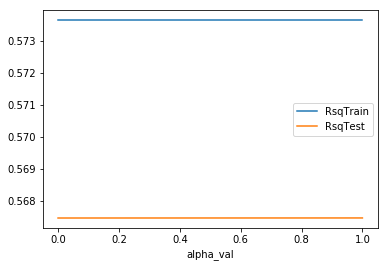

In [29]:
# alpha RsqTest of 0.666667 is highest at 0.567466, so this is the "best" model of the hyperparameter tested, 
# however it doesn't look like that moved the needle at all.

# plot results
ridge_results_df.plot(x='alpha_val', y=['RsqTrain', 'RsqTest'])

In [30]:
reg_bestfit = Ridge(alpha=0.666667)
reg_bestfit.fit(X_train, y_train)
print("Training set R^2 score: {:.2f}".format(reg_bestfit.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(reg_bestfit.score(X_test, y_test)))

Training set R^2 score: 0.57
Test set R^2 score: 0.57


# Build Supervised Model 3: Random Forest

In [31]:
# Predict median house value using RF Regression.
# Will not need to resample data, will re-use X_train and y_train datasets as re-sample between algorithm runs would be changing
# the input data and then we won't be able to tell which improved the fit

#from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
# Just using the defaults, it provides a model fit of 0.96. Which when we see a score
# this high, it almost certainly means the model is overfit. When we score the test set, we see a fit of 0.76,
# which is quite a bit of deterioration compared to the training set. So we should try to set of inputs,
# such that the performance between the training and test sets are possibly improved. 

print("Training set R^2 score: {:.2f}".format(regr.score(X_train, y_train)))
print("Training set R^2 score: {:.2f}".format(regr.score(X_test, y_test)))

Training set R^2 score: 0.96
Training set R^2 score: 0.77


In [33]:
# Because we suspect the model is overfitting, it suggests that modifying hyperparameters such as 
# max_depth (the number of variable interactions) and min_samples_leaf (the number of data points 
# in any given segment of data) may help. So requiring a minimum number of data points in a segment, 
# we likely get a more generalized model, instead of the current default of a minimum of 1 value in each leaf

# Vary min_samples_leaf with loop through
rf_results = []
for i in range(1, 20):
    # make predictions using looped neighbors
    regr_loop = RandomForestRegressor(min_samples_leaf=i, random_state=321)
    regr_loop.fit(X_train, y_train)
    rf_results.append((i, regr_loop.score(X_train, y_train), regr_loop.score(X_test, y_test)))

In [34]:
rf_results_df = pd.DataFrame(rf_results, columns=['min_samples_leaf','RsqTrain', 'RsqTest'])
rf_results_df

,min_samples_leaf,RsqTrain,RsqTest
0,1,0.958216,0.765649
1,2,0.941529,0.764991
2,3,0.922579,0.768181
3,4,0.904494,0.771128
4,5,0.889148,0.773620
5,6,0.877396,0.772079
6,7,0.866758,0.770893
7,8,0.858305,0.770138
8,9,0.850478,0.768411
9,10,0.843813,0.768922


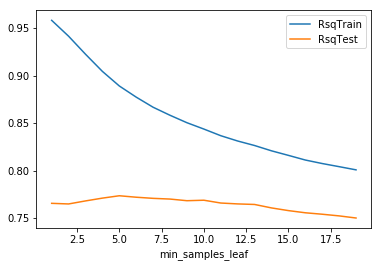

In [35]:
# min_samples_leaf RsqTest of 5 is highest at 0.773620, so this is the "best" model of the hyperparameters we tested. 
# With larger datasets we would set the min_values_leaf to several hundred, or even 1% of the overall sample.

rf_results_df.plot(x='min_samples_leaf', y=['RsqTrain', 'RsqTest'])

# Assess and Select best model

In [36]:
# Assessing KNN with 6 neighbors as best fit
reg_bestfit = KNeighborsRegressor(n_neighbors=6)
reg_bestfit.fit(X_train, y_train)
print("Training set R^2 score: {:.2f}".format(reg_bestfit.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(reg_bestfit.score(X_test, y_test)))

Training set R^2 score: 0.35
Test set R^2 score: 0.12


In [37]:
# Assessing Ridge Regressor with alpha of .666667 as best fit
reg_bestfit = Ridge(alpha=.666667)
reg_bestfit.fit(X_train, y_train)
print("Training set R^2 score: {:.2f}".format(reg_bestfit.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(reg_bestfit.score(X_test, y_test)))

Training set R^2 score: 0.57
Test set R^2 score: 0.57


In [38]:
# Assessing Random Forest Regression with min_samples_leaf of 5
reg_bestfit = RandomForestRegressor(min_samples_leaf=5)
reg_bestfit.fit(X_train, y_train)
print("Training set R^2 score: {:.2f}".format(reg_bestfit.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(reg_bestfit.score(X_test, y_test)))

Training set R^2 score: 0.89
Test set R^2 score: 0.77


##    Conclusions
* KNN shows the more believable model than Ridge Regressor as there is variance between the training and test set. Pros:  Doesn’t require any assumptions about the data or its distributions (i.e. it’s “nonparametric”), which means it is not sensitive to high correlation between data features. Cons: Because the optimization metric is “closeness”, it does depend on the amount of data we have, and our 20k sample may not be enough to reach parity.

* Tried Ridge Regressor because it has regularization, but realize that this is not the best model type to fit the data set. This is why alpha of .66667 was showing the 'best' score but negligibly moved the needle, because the coefficients were being barely restricted. Pros: Ridge regression is a parametric methods and assumes something about the data distribution, such as having normally distributed residuals. Ridge regression normalizes the model coefficients, which helps in scenarios where you do have high-correlations between data features. Cons: In the case of our CA Housing data, there were no high-correlations, non-linear data.

* Random Forest has the best fit model of all three and is more believeable with the tuned hyperparameter of min_samples_leaf. The Training set and Test set scores have a believeable variance and the test set score is lower than the training fit as it should be. Pros: Random Forest uses lots of different models as set by the n_estimator hyperparameter. By sampling some of the rows, and some of the features for each model, we can model lots of different subsets of the data, finding additional information that we don’t get by picking a single “best” model. Cons: Because we can fit huge numbers of models, random forest can take a long time to calculate and is more prone to overfitting such as we saw with the default values. However, as the hyperparameter of min_samples_leaf tuned the model, we saw a believeable improvement and should pick Random Forest as our best fit model. 